In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.stats import gaussian_kde
import random 
import scipy
from scipy import stats
import itertools
import matplotlib.patches as pat
import glob
import os
import pathlib 
import re
import os

class PointsGenerater:
    
    def  __init__(self, points):
        self.points = points
        if len(self.points) == 0:
            self.points = self.cone_random_gen()
    
    def random_generate(self, d, m):
        #n:次元
        #m:個数
        np.random.seed(40)
        self.points = np.random.rand(m, d)
        return self.points
    
    def two_random_gauss(self):
        np.random.seed(663)
        points_1 = np.random.multivariate_normal(
            [10,10],
            size=(1,300),
            cov=[
                [10,1],
                [0,14]])[0]
        points_2 = np.random.multivariate_normal(
            [-10,-10],
            size=(1,300),
            cov=[
                [15,0],
                [0,20]])[0]
        self.points = np.append(points_1, points_2, axis=0)
        return self.points
    
    def cone_random_gen(self):
        np.random.seed(800)
        
        self.points = np.random.multivariate_normal(
            [0,0],
            size=(1,200),
            cov=[
                [50,0],
                [0,50]])[0]

        for i in range(3):
            i += 1
            points_1 = np.random.multivariate_normal(
                [i * 17, i * 17],
                size=(1,200),
                cov=[
                    [50,0],
                    [0,50]])[0]

            points_2 = np.random.multivariate_normal(
                [i * 25, 0],
                size=(1,200),
                cov=[
                    [40,0],
                    [0,50]])[0]
            self.points = np.append(
                np.append(self.points, points_1, axis=0), 
                points_2, 
                axis=0
            )
        return self.points
    
    def random_points(self):
        return
    
    def multiply_lattice_constant(self, points):
        return
        
    def normalization(self):
        #計算量を下げるため真ん中に寄せる
        return (self.points - np.mean(self.points)) * 100

class BoxSetter:

    def __init__(self, dimention=3):
        self.dimention = dimention
        self.base_vectors:np.array = np.eyes(dimention)
        
    def base_vectors_change(self, b_vectors:np.array):
        self.base_vectors = b_vectors

class VoronoiModel:

    def __init__(self, points:np.array ):

        '''
            #[[1,2,3,4],[71,3,21,4],[-1,3,42,4]...]それぞれはveriticesのインデックス
            self.regions = self.vor.regions

            #keyがpointのインデックスでvalueがregionのインデックス
            self.point_region = self.vor.point_region
            #以下いずれも、立体を作れないもののデータは除いてある
            #-1をregionsに含むものをのぞいている

            #keyはpointsのインデックス,valueはConvexHullオブジェクト
            self.all_CHes = dict()
            #keyはpointsのインデックス,valueはその体積
            self.all_volumes = dict()

            self.cleaned_points = list()
        '''
        
        self.vor = Voronoi(points)
        self.points = self.vor.points
        self.vertices = self.vor.vertices
        self.ridge_vertices = self.vor.ridge_vertices
        self.ridge_points = self.vor.ridge_points
        self.regions = self.vor.regions
        self.point_region = self.vor.point_region
        self.all_volumes = dict()
        self.all_CHes = dict()
        self.cleaned_points = list()
        self.name = 'Voronoi'

    def cal_volume(self):
        num_of_points = len(self.points)
        
        for i in range(num_of_points):
            region = self.regions[self.point_region[i]]
            if -1 in tuple(region):
                continue
            ch = ConvexHull(self.vertices[region])
            self.all_volumes[i], self.all_CHes[i] = ch.volume, ch
            self.cleaned_points.append(i)

    def remove_edge_points():
        return

class DelaunayModel:

    def __init__(self, points:np.array):

        '''
            #点のベクトルのリスト[[0.1,4.5,6.3],[2,4.9,7.1]...]インデックスが点の番号
            self.points = self.dln.points
            #三角系をなしている点のリストのリスト[[1,3,2,1],[1,0,4,2]...]
            self.vertices = self.dln.vertices
            #三角系をなしている点のリストのリスト[[1,3,2,5],[1,0,4,2]...]
            self.simplices = self.dln.simplices
            # 凸包の底面のリスト[[1,2,0],[3,4,5]...]
            self.convex_hull = self.dln.convex_hull
            #simplicesのインデックス,key三角形のインデックス(simplicesのいんでくす),value:その三角形のConvexHullオブジェクト
            self.all_CHes = self._return_CHes()
            #convexの体積の辞書key:三角形のインデックる,value:その三角形の体積
            self.all_volumes = dict()
            #あるpointのnum(key)に足してそれが属する三角形の体積のリスト(value)、上から番号を付与している
            self.dict_of_points_and_volumes
            #あるpointのnum(key)にたいしてそれが属する三角形の体積全ての平均値(value)
            self.point_volume_dict
            self.name = 'Delaunay'
        '''
        
        self.dln = Delaunay(points)
        self.points = self.dln.points
        self.vertices = self.dln.vertices
        self.simplices = self.dln.simplices
        self.convex_hull = self.dln.convex_hull
        self.all_CHes = self._return_CHes()
        self.all_volumes = dict()
        self.dict_of_points_and_volumes = self.make_empty_dict()
        self.point_volume_dict = dict()
        self.name = 'Delaunay'
    
    def _return_CHes(self):
        regions = dict()
        ch = ConvexHull
        for i, j in enumerate(self.simplices):
            regions[i] = ch(
                self.points[j]
            )
        return regions
    
    def cal_volume(self):
        num_of_simplices = len(self.simplices)
        for i in range(num_of_simplices):
            self.all_volumes[i] = self.all_CHes[i].volume
        self.cal_point_volume()
    
    def cal_point_volume(self):
        
        for volume_num, ver in enumerate(self.vertices):
            for point_num in ver:
                self.dict_of_points_and_volumes[point_num].append(self.all_volumes[volume_num])
        
        for num ,value in self.dict_of_points_and_volumes.items():
            how_many = len(value)
            try:
                self.point_volume_dict[num] = sum(value) / how_many
            except ZeroDivisionError:
                print(num)
                self.point_volume_dict[num] = 0
    
    def make_empty_dict(self):
        dict_of_points_and_volumes = dict()
        for i in range(len(self.points)):
            dict_of_points_and_volumes[i] = []
        return dict_of_points_and_volumes
            
    
class KernelDesityEstimation:
    
    '''
    kernel関数数はガウスカーネル
    三角形や四角形のカーネルの方が良さそう
    いつか実装する
    '''
    
    def __init__(self, points:np.array):
        self.points = points
        self.transposed_points = points.T
        self.density_dict = dict()
        self.kde = None
        self.name = 'KDE'
        
    def density_estimation(self):
        self.kde = gaussian_kde(self.transposed_points)
        print(self.kde)
        for num, point in enumerate(self.points):
            self.density_dict[num] = self.kde.evaluate(point)
        return self.density_dict
        
class Tesselation:

    def __init__(self, points=np.empty(0)):
        self.points = points #生データ
        self.model_points = None #modelが持つpoints, modelインスタンスにデータを持たせる必要がある, またdataを正規化したものが入る
        #Voronoi
        self.v_points_volumes = dict()
        self.v_model = None
        #Delaunay
        self.d_points_volumes = dict()
        self.d_model = None
        #KDE
        self.kde_model = None
        self.kde_density = dict()
        self.kde_function = None
    
    def voronoi_cal(self, random=False):
        model = VoronoiModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.v_model = model
        self.v_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def v_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2 and any(self.v_points_volumes):
            pass
        elif dimention == 3 and any(self.v_points_volumes):
            if what == 'points':
                display.v_points(self.v_model.points)
            elif what == 'vertices':
                display.points(self.v_model.vertices)
            elif what == 'ridge_points':
                display.v_ridge_points(
                    self.v_model.ridge_points,
                    self.v_model.points
                )
            elif what == 'ridge_vertices':
                display.v_ridge_vertices(
                    self.v_model.ridge_vertices,
                    self.v_model.vertices
                )
            elif what == 'region_points':
                display.v_region_and_points(
                    self.v_model.vertices,
                    self.v_model.regions,
                    self.v_model.point_region
                )
            else:
                pass
    
    def v_show_data(self):
        table = Table(self.v_model).make_table()
        return table       
            
    def delaunay_cal(self, random=False):
        model = DelaunayModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.d_model = model
        self.d_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def d_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2:
            pass
        elif dimention == 3:
            if what == 'points':
                display.d_points(self.d_model.points)
            elif what == 'region_points':
                display.d_region_and_points(
                    self.d_model.points, 
                    self.d_model.vertices
                )
    
    def d_show_data(self):
        table = Table(self.d_model).make_table()
        return table
    
    def kernel_density_estimation(self):
        model = KernelDesityEstimation(
            PointsGenerater(self.points).normalization()
        )
        self.kde_density = model.density_estimation()
        self.kde_function = model.kde
        self.kde_model = model
        self.model_points = model.points
    
    def kde_show_data(self):
        table = Table(self.kde_model).return_table()
        return table
    
    def kde_delaunay_model_show(self):
        display = Displayer(dimention=2)
        display.kde_d_model_drawing(
            self.model_points, 
            self.d_model, 
            self.kde_function
        )

class Table:
    
    def __init__(self, model):
        self.model = model
        self.model_name = model.name
        self.points = model.points
        self.v_table = pd.DataFrame()
        self.d_table = pd.DataFrame()
        self.kde_table = pd.DataFrame()

    def make_table(self):
        if self.model_name == 'Delaunay':
            num_of_points = len(self.model.points)
            self.d_table = pd.DataFrame(
                index=[i for i in range(num_of_points)],
                columns=[
                    'volume', 
                    'point_index'
                    ]
            )
            for i in range(num_of_points):
                self.d_table.iloc[i,:] = [
                    self.model.point_volume_dict[i],
                    i
                ]
            return self.d_table
        
        elif self.model_name == 'Voronoi':
            self.v_table = pd.DataFrame(
                columns=['volume', 
                        'vertices', 
                        'num_of_vertices', 
                        'convex_hull_index(index_of_point)'
                        ],
                index=[i for i in range(len(self.model.cleaned_points))]
            )
            counter = 0
            for i in self.model.cleaned_points:
                self.v_table.iloc[counter,:] = [
                    self.model.all_volumes[i],
                    self.model.vertices[
                        self.model.regions[
                            self.model.point_region[i]
                            ]
                        ],
                    self.model.regions[self.model.point_region[i]],
                    i
                ]
                counter += 1
            return self.v_table
                
        elif self.model_name == 'KDE':
            self.kde_table = pd.DataFrame(
                columns=['density', 'point_index', 'point'],
                index=[i for i in range(len(self.model.points))]
            )
            for index, density in self.model.density_dict.items():
                self.kde_table.iloc[index,:] = [
                    density,
                    index,
                    self.model.points[index]
                ]
            return self.kde_table
    
    def is_table(self):
        if self.model_name == 'Delaunay':
            return bool(any(self.d_table))
        elif self.model_name == 'Voronoi':
            return bool(any(self.v_table))
        elif self.model_name == 'KDE':
            return bool(any(self.kde_table))
    
    def return_table(self):
        if self.model_name == 'Delaunay':
            if self.is_table():
                return self.d_table
            else:
                return self.make_table()
        elif self.model_name == 'Voronoi':
            if self.is_table():
                return self.v_table
            else:
                return self.make_table()
        elif self.model_name == 'KDE':
            if self.is_table():
                return self.kde_table
            else:
                return self.make_table()
    
    @staticmethod
    def take_higher(p_v_dict, per):
        higher = np.percentile(np.array(list(p_v_dict.values())), per)
        return dict(filter(lambda item: item[1] > higher, p_v_dict.items()))
    

class Displayer:

    def __init__(self, dimention):
        self.dimention = dimention

    def v_points(self, points):
        if self.dimention == 2:
            fig, (ax1, ax2)= plt.subplots(2)
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()
    
    def v_vertices(self, vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Vertices of Voronoi cells')
            x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
            ax.plot(x, y, z, "o", color="green", ms=4, mew=0.5)
            plt.show()
    
    def v_ridge_points(self, ridge_points, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')

            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Pairs of atoms between which each Voronoi ridge plane lies')
            for pair in points[ridge_points]:
                ax.plot(pair[:, 0], pair[:, 1], pair[:, 2], color='C0')
            plt.show()
    
    def v_ridge_vertices(self, ridge_vertices, v_vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('a')
            ax.set_ylabel('b')
            ax.set_zlabel('c')
            ax.set_aspect('equal')
            ax.set_xlim(-10,10)
            ax.set_ylim(-10,10)
            ax.set_zlim(-10,10)
            ax.set_title('Voronoi ridge planes')
            ridgenum = 0
            for i in np.array(ridge_vertices):
                #-1を含むものを取り除く
                if -1 not in i:
                    vertices = v_vertices[i]
                    xy, z = vertices[:, :-1], vertices[:, -1]
                    ridgenum += 1
                    poly=a3.art3d.Poly3DCollection([vertices],alpha=0.3)
                    poly.set_edgecolor('b')
                    poly.set_facecolor([0.5, 0.5, 1])
                    ax.add_collection3d(poly)
            plt.show()
        
    def v_region_and_points(self, vertices, regions, point_region):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Voronoi ridge planes')
        '''
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zlim(-10,10)
        '''
        
        for p in range(len(point_region)):
            color = f'C{p//2}' # 'C0' or 'C1'
            # Voronoi regionの頂点から凸包(convex hull)を求めてその面を表示
            if -1 in tuple(regions[point_region[p]]):
                continue
            ch = ConvexHull(vertices[regions[point_region[p]]])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.3, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)

            chpnts = ch.points[ch.vertices]
            ax.plot(
                chpnts[:, 0], 
                chpnts[:, 1], 
                chpnts[:, 2], 
                ".", 
                color=color, 
                ms=10, 
                mew=0.5
            )
        
    def d_points(self, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()
    
    def d_region_and_points(self, points, d_vertices):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Delaunay planes')

        for n, pair in enumerate(d_vertices):
            color = f'C{n//2}'
            ch = ConvexHull(points[pair])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.1, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)
            chpnts = ch.points[ch.vertices]
            ax.plot(chpnts[:, 0], chpnts[:, 1], chpnts[:, 2], ".", color=color, ms=10, mew=0.5)
    
    def kde_d_model_drawing(self, points, d_model, kde_model):
        if self.dimention == 2:
            fig = plt.figure(facecolor="w", figsize=(10,10))
            ax = fig.add_subplot(111, title="kernel density estimation and Delaunay tessellation")
            _x = points[:,0]
            _y = points[:,1]
            xlim = (np.min(_x) - 0.1, np.max(_x) + 0.1)
            ylim = (np.min(_y) - 0.1, np.max(_y) + 0.1)
            x = np.linspace(xlim[0], xlim[1], int((xlim[1] - xlim[0])) * 10 )
            y = np.linspace(ylim[0], ylim[1], int((ylim[1] - ylim[0])) * 10 )
            xx, yy = np.meshgrid(x, y)
            meshdata = np.vstack([xx.ravel(), yy.ravel()])
            z = kde_model.evaluate(meshdata)
            ax.scatter(points[:, 0], points[:, 1], c="b")
            
            higher_list = list(Table.take_higher(
                d_model.point_volume_dict, 
                per=99
                ).keys()
            )
            ax.scatter(points[higher_list][:,0], points[higher_list][:,1], c='r')
            ax.contourf(
                xx, 
                yy, 
                z.reshape(len(y), len(x)), 
                cmap="Blues", 
                alpha=0.5
            )
            
            for n, pair in enumerate(d_model.vertices):
                #color = f'C{n//2}'
                three_points = points[pair]
                poly = pat.Polygon(
                    three_points,
                    alpha = 0,
                    linestyle=':'
                    
                )
                ax.add_patch(poly)
                ax.plot(
                    three_points[:,0], 
                    three_points[:,1], 
                    lw=0.5, 
                    linestyle='--',
                    color='green', 
                    alpha=0.5
                )
            plt.show()


class Analyzer(Tesselation):
    
    def __init__(self, directory_path):
        self.data = pd.DataFrame(self.construct_data(directory_path), columns=['time', 'x', 'y', 'z', 'trial', 'cycle', 'reprica'])
        self.points = np.array(self.data.loc[:, ['x', 'y', 'z']], dtype='float')
        super().__init__(self.points)
        self.d_result = None
        self.v_result = None
        self.kde_result = None
        
    def show_data_delaunay(self):
        calculated_table = self.d_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.d_result = merged_table
    
    def show_data_kde(self):
        calculated_table = self.kde_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.kde_result = merged_table
    
        
    def show_data_voronoi(self):
        calculated_table = self.v_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.v_result = merged_table
    
    def generate_data(self, data_path):
        data = []
        with open(data_path, 'r') as f:
            read_line = f.readlines()
        
        name_info_list = self.extract_file_name_info(
            os.path.basename(data_path)
        )

        for line in read_line[25:]:
            record_list = list(map(float, line.replace('\n', '').replace(' ', '').split('\t')))
            record_list.extend(name_info_list)
            data.append(record_list)

        return data

    def list_of_files(self, directory_path, suffix):
        files = glob.glob(os.path.join(directory_path, '*'+ suffix))
        return files

    def construct_data(self, directory_path, suffix='.txt'):
        data = []
        
        for path in self.list_of_files(directory_path, suffix):
            data.extend(self.generate_data(path))
        
        return np.array(data)
    
    def to_float(self, record_list):
        float_list = []
        for num in record_list:
            float_list.append(float(num))
        return float_list
    
    def extract_file_name_info(self, file_name):
        return re.findall(r'\d+', file_name)
        
        
        
    

In [155]:
path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/sample_1/'

analysis = Analyzer(path)




In [160]:
pd.merge(analysis.data, analysis.d_show_data(), how='outer', left_index=True, right_index=True)

,time,x,y,z,trial,cycle,reprica,volume,point_index
0,0.0,10.9983,4.98832,4.81787,1,6,15,0,0
1,0.5,10.9918,4.9905,4.82993,1,6,15,0.096043,1
2,1.0,10.9705,4.98378,4.85512,1,6,15,0.028703,2
3,1.5,10.9587,4.97225,4.86184,1,6,15,0.059597,3
4,2.0,10.9484,4.97145,4.87296,1,6,15,0.022955,4
...,...,...,...,...,...,...,...,...,...
168835,98.0,10.7972,4.91805,4.65124,1,1,11,1.484731,168835
168836,98.5,10.7784,4.91217,4.6493,1,1,11,0.570002,168836
168837,99.0,10.7842,4.92889,4.63135,1,1,11,0.950342,168837
168838,99.5,10.7872,4.9222,4.61677,1,1,11,0.767337,168838


In [157]:
analysis.delaunay_cal()

0
201
216
219
1206
1809
2010
2211
2613
3100
3101
3103
3216
3260
3262
3819
4422
5427
5628
5829
6030
6231
6432
6834
7236
7475
7476
7477
7638
8040
8442
8643
9447
10251
10342
10348
10350
10351
10353
10356
10358
10359
10360
10372
10374
10377
10379
10380
10418
10437
10439
10452
10585
10854
11055
11256
11944
12107
12261
12864
13065
13266
14472
14673
14874
15276
15477
15678
16080
16281
16683
17085
17250
17252
17253
17261
17263
17265
17271
17272
17274
17275
17278
17279
17280
17282
17285
18291
18894
19095
19698
20100
20904
22512
23115
24120
24924
25125
25326
25527
25728
26127
26331
26822
26825
26919
26924
26926
26930
27135
28341
28356
28357
28358
28359
28362
28944
29145
30552
31522
31557
31911
31959
32363
33969
34572
35175
35577
35979
36180
36381
36582
36783
36984
37185
37386
37517
37989
38190
39597
40172
40173
40174
40175
40176
40178
40180
40182
40183
40185
40187
40188
40189
40190
40191
40401
40618
41004
41412
41414
41424
41425
41607
41808
42009
42690
42740
43014
43818
44230
44282
44284
44354
4

In [167]:
df = analysis.show_data_delaunay().sort_values('volume', ascending=False).loc[:,['cycle', 'reprica', 'volume']]

In [171]:
x = np.array(df.cycle, dtype='int')
y = np.array(df.volume)

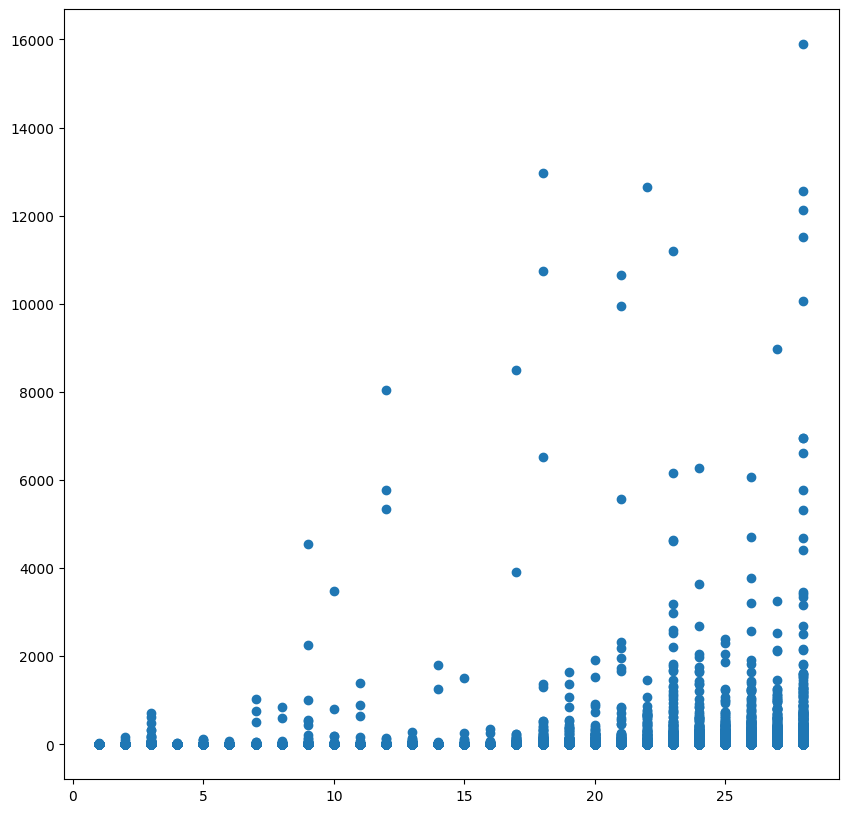

In [175]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)

In [112]:
analysis.points

array([['10.9983', '4.98832', '4.81787'],
       ['10.9918', '4.9905', '4.82993'],
       ['10.9705', '4.98378', '4.85512'],
       ...,
       ['10.7842', '4.92889', '4.63135'],
       ['10.7872', '4.9222', '4.61677'],
       ['10.7979', '4.92588', '4.62447']], dtype=object)

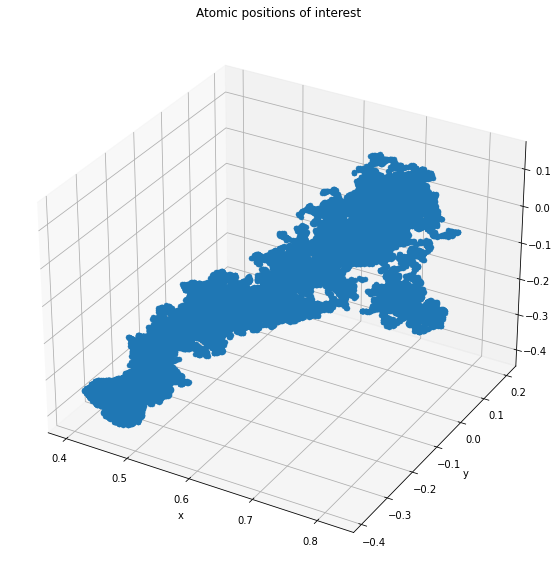

In [14]:
analysis.d_display(3, 'points')

In [13]:
analysis.delaunay_cal()

0
201
216
219
1206
1809
2010
2211
2613
3100
3101
3103
3216
3260
3262
3819
4422
5427
5628
5829
6030
6231
6432
6834
7236
7475
7476
7477
7638
8040
8442
8643
9447
10251
10342
10348
10350
10351
10353
10356
10358
10359
10360
10372
10374
10377
10379
10380
10418
10437
10439
10452
10585
10854
11055
11256
11944
12107
12261
12864
13065
13266
14472
14673
14874
15276
15477
15678
16080
16281
16683
17085
17250
17252
17253
17261
17263
17265
17271
17272
17274
17275
17278
17279
17280
17282
17285
18291
18894
19095
19698
20100
20904
22512
23115
24120
24924
25125
25326
25527
25728
26127
26331
26822
26825
26919
26924
26926
26930
27135
28341
28356
28357
28358
28359
28362
28944
29145
30552
31522
31557
31911
31959
32363
33969
34572
35175
35577
35979
36180
36381
36582
36783
36984
37185
37386
37517
37989
38190
39597
40172
40173
40174
40175
40176
40178
40180
40182
40183
40185
40187
40188
40189
40190
40191
40401
40618
41004
41412
41414
41424
41425
41607
41808
42009
42690
42740
43014
43818
44230
44282
44284
44354
4

In [149]:
analysis.d_show_data().sort_values('volume', ascending=False).head(20)

,volume,point_index
135417,37262.075154,135417
61500,30390.06985,61500
96848,29666.457394,96848
20669,29458.436302,20669
20640,28457.559846,20640
135443,26979.445739,135443
117880,26246.396792,117880
73302,25190.496184,73302
11255,24972.281892,11255
24493,23617.633217,24493


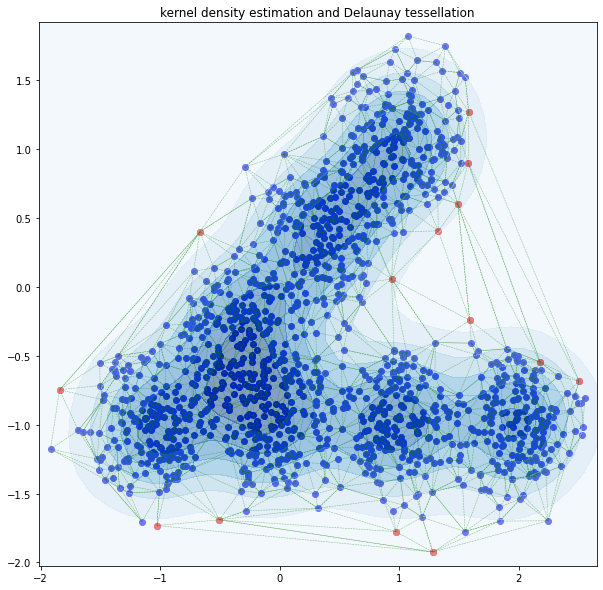

In [110]:
a.kde_delaunay_model_show()

In [40]:
a.d_show_data().sort_values('volume', ascending=False).head(20)

,volume,point_index
1370,53.7489,1370
800,53.2807,800
1225,47.3743,1225
1376,39.8039,1376
1147,37.4782,1147
935,36.1203,935
1127,31.9693,1127
1381,26.8142,1381
1124,26.3379,1124
1197,25.4962,1197


In [41]:
a.kde_show_data().sort_values('density').head(20)

/Users/mukaiyama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


,density,point_index,point
1225,[8.06017005084424e-06],1225,"[58.6608973393424, -47.906427578169684]"
1370,[1.240026121129978e-05],1370,"[47.77829207188799, -3.400155443855816]"
253,[1.955634128811026e-05],253,"[-18.917560776067482, 9.811378018543369]"
800,[2.082518814818553e-05],800,"[19.656568492870345, -46.80830680664097]"
935,[2.3830079628715077e-05],935,"[35.523360023332486, -5.023828508537658]"
1204,[2.6582968464918443e-05],1204,"[66.0767863756629, -35.00525866402062]"
93,[2.6950476253473918e-05],93,"[-40.45415881226516, -12.476936287301248]"
1197,[2.8123654682112618e-05],1197,"[33.164937515390434, -4.919672004138899]"
1138,[2.817209301964016e-05],1138,"[13.018131591262904, 42.410948240776534]"
287,[2.905858532769331e-05],287,"[-27.217373830509196, 0.7412159018172488]"


In [42]:
a.v_show_data().sort_values('volume', ascending=False).head(20)

/Users/mukaiyama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


,volume,vertices,num_of_vertices,convex_hull_index(index_of_point)
116,11903.6,"[[-31.530670410028197, -38.843246581710666], [...","[83, 17, 9, -1, 2, 10, 82]",116
253,9814.03,"[[-12.128082661408055, 11.466864262206226], [-...","[611, 47, 46, 0, 1, -1, 3, 21, 116, 240, 609]",253
1138,6144.28,"[[5.261956385902488, 40.152860022727], [12.983...","[1603, 822, 487, 118, -1, 1, 1602]",1138
160,3894.59,"[[-2.330994293056493, -71.61663923427187], [-1...","[1284, 897, -1, 9, 16, 189, 702, 1082, 1081, 1...",160
1147,3891.01,"[[41.35861639181952, 28.118835139862096], [44....","[131, 34, 33, 32, -1, 5, 7, 4, 128, 129, 130]",1147
287,2571.09,"[[-26.678743887034955, -1.5545694888351442], [...","[24, 12, 3, 21]",287
1361,2318.27,"[[71.86019708390462, -27.151182523613024], [-4...","[349, -1, 5, 6, 51, 348]",1361
93,2259.37,"[[-38.79490419703691, -15.127413199991768], [-...","[101, -1, 3, 12, 97]",93
799,1459.28,"[[-14.286226975568312, 48.19294576978], [-102....","[1602, 1, 0, 42, 41, 14, 27, 1601]",799
800,1243.31,"[[11.2125480244048, -46.297511416464424], [10....","[991, 896, 897, -1, 8, 183, 989]",800


In [2]:
import numpy as np
m = 2
d = 3
data =np.random.rand(m, d)

In [3]:
data

array([[0.96961083, 0.66418169, 0.19542559],
       [0.85886197, 0.74446384, 0.04801438]])

In [177]:
v = np.array([[1,2,3], [3,4,5], [1,2,5], [5,2,1]])

d = Voronoi(v)


In [178]:
d.points

array([[1., 2., 3.],
       [3., 4., 5.],
       [1., 2., 5.],
       [5., 2., 1.]])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.stats import gaussian_kde
import random 
import scipy
from scipy import stats
import itertools
import matplotlib.patches as pat
import glob
import os
import pathlib 

In [7]:
points = np.array([[1,2,3], [1,2,4], [3,4,2], [5,3,2]])

d = Delaunay(points)

In [8]:
d.points

array([[1., 2., 3.],
       [1., 2., 4.],
       [3., 4., 2.],
       [5., 3., 2.]])

In [22]:
import glob
import os
import numpy as np

def generate_data(data_path):
    data = []
    with open(data_path, 'r') as f:
        read_line = f.readlines()
    counter = 0
    for c, line in enumerate(read_line):
        if c >= 25:
            record_list = line.replace('\n', '').replace(' ', '').split('\t')[1:]
            data.append(record_list)
    return data

def list_of_files(directory_path, suffix):
    files = glob.glob(os.path.join(directory_path, '*'+ suffix))
    return files

def construct_data(directory_path, suffix):
    data = []
    for path in list_of_files(directory_path, suffix):
        data.extend(generate_data(path))
    return np.array(data)

In [23]:
directory_path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/sample_1/'
d = construct_data(directory_path, '.txt')

In [47]:
d.any()

UFuncTypeError: ufunc 'logical_or' did not contain a loop with signature matching types (None, <class 'numpy.dtype[str_]'>) -> None

TypeError: 'NoneType' object is not iterable

In [50]:
any('default')

True

In [52]:
d_empty = np.empty([0])

In [61]:
any(d_empty)

False

In [60]:
any(np.array([1,2]))

True

In [80]:

for i in ['3', '4']:
    print(float(i))

3.0
4.0


In [105]:
float('4.4')

4.4

In [116]:
np.array([3,4])

array([3, 4])